#  Research on car sales ads

# Author : James Amezcua

# Introduction

The report presents the exploratory analysis of a dataset of 51525 free advertisements for vehicles on Crankshaft list, posted from 2018-05-01 to 2019-04-19. 

At the data preprocessing stage, we will address the issues of missing values and wrong data types, and also add columns where it fits in order to maximize the information it can present.

The analysis that follows first of all examines the pattern of the advertisements in a range of factors such as price, model year, cylinders, and mileage. Then we will look at what are the characteristics of cars that tend to be gone quickly, as well as of those that stay on the list longer than most. Finally, we will take a closer look at car prices, and investigate which factors influence the price of a vehicle, using the two most popular vehicle types as examples.



# Table of Content

Part 1: Open the data file and study the general information

Part 2: Data preprocessing

Part 3: Make calculations and add them to the table

Part 4: Carry out exploratory data analysis

Part 5: Determine what factors impact price the most

Part 6: Overall Conclusion



# Part 1: Open the data file and study the general information. 

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv('https://code.s3.yandex.net/datasets/vehicles_us.csv')
vehicles = pd.DataFrame(data=data)
print(vehicles.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


# Conclusion

Based on the info of the data, it appears to be that 5 out of 13 columns have some missing data or 'NaNs'. Those columns are 'model_year', 'cylinders' , 'odometer' and 'is_4wd'. We can also oberve that we have some float datatype which will have to be converted to int.


# Part 2: Data preprocessing

In [2]:
# print the number of missing values per column
vehicles.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [3]:
# function to calculate the percentage of missing values
def missing_values_table(df):
        # Total missing values
        mis_val = vehicles.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * vehicles.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [4]:
# check missing data
missing_values_table(vehicles)

Your selected dataframe has 13 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
is_4wd,25953,50.4
paint_color,9267,18.0
odometer,7892,15.3
cylinders,5260,10.2
model_year,3619,7.0


In [5]:
# check the statistics of the numerical variables
vehicles.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000



From the check for missing values, we can see that we have a couple of columns with missing values which we have to preprocess. For instance, is_4wd has 50% of its values missing. This could either mean that the missing values represent vehicles that are not 4wd so we replace missing values with 0.

In [6]:
# replace 'NaNs' in the `is_4wd` column with 0
vehicles['is_4wd'].fillna(0, inplace = True)
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [7]:
# check highest odometer reading
vehicles.loc[vehicles['odometer'] == 990000]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
17869,59900,1964.0,chevrolet corvette,like new,NaN,gas,990000.0,automatic,convertible,red,0.0,2018-06-17,28
40729,4700,2013.0,chevrolet cruze,good,6.0,gas,990000.0,automatic,sedan,black,0.0,2018-05-02,4


Using the isnull().sum() method shows that our data have missing values. A brief check through our data shows that we have both categorical and quantitative missing values. The appearance of missing value is random and does not show any pattern. The type of missing values we have is Missing at random (MAR) .i.e. the value is missing because there is no value recorded in that column. This could have resulted because the analyst collecting or recording the data did not fill in any data for that row, or data corruption or signal error occured while tranferring the data to the database. For instance, the is_4wd have about 50% of its data missing which could mean the missing values represents values for which the response is False. The is_4wd is a special kind of categorical variable called a logical(Boolean) variable, which means its value can be True (or 1) or False (or 0).

Using the describe() method, we can observe some discrepancies with the data. For instance, the maximum value price is 375,000. A quick check of the row shows that the car with the highest price is a 1999 nissan frontier with 115000 odometer reading. This shows that we need to deal with outliers in the price column because this doesn't seem right. Since the number of missing values in model_year and cylinders is less than 10%, we would drop missing values in this columns. We can also fill NaN in the paint_column with a new category others since there is no way get the median of a categorical variable. Another way to handle missing values in the paint_column would be to use the mode but that would likely skew our analysis in the long run. The odometer column contains significant outliers, so we will replace the missing value with the median of the column.


In [8]:
# drop 'NaNs' in model_year and cylinders column
vehicles = vehicles.dropna(subset=['model_year', 'cylinders']).reset_index(drop=True)
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


In [9]:
# fill in missing values in the `paint_color` with others
vehicles['paint_color'] = vehicles['paint_color'].fillna(value='others')

In [10]:
# fill missing values with the median of the column
med = vehicles['odometer'].median()

vehicles['odometer'] = vehicles['odometer'].fillna(med)
vehicles['odometer'].head()

0    145000.0
1    110000.0
2    113000.0
3     80903.0
4     57954.0
Name: odometer, dtype: float64

In [11]:
# check for missing values in new dataframe
missing_values_table(vehicles)

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Now we have dataset with no missing values.

In [12]:
cylinders_model = vehicles.groupby('model').agg({'cylinders': ('mean','median')})
print(cylinders_model)

                  cylinders       
                       mean median
model                             
acura tl           5.970000    6.0
bmw x5             6.389610    6.0
buick enclave      6.000000    6.0
cadillac escalade  7.992537    8.0
chevrolet camaro   6.871795    6.0
...                     ...    ...
toyota sienna      5.956364    6.0
toyota tacoma      5.344165    6.0
toyota tundra      7.922330    8.0
volkswagen jetta   4.272517    4.0
volkswagen passat  4.323024    4.0

[100 rows x 2 columns]


In [13]:
vehicles['cylinders'] = vehicles['cylinders'].fillna(vehicles.groupby('model')['cylinders'].transform('median'))
print(vehicles['cylinders'])

0        6.0
1        4.0
2        8.0
3        4.0
4        6.0
        ... 
43004    6.0
43005    4.0
43006    4.0
43007    4.0
43008    4.0
Name: cylinders, Length: 43009, dtype: float64


In [14]:
model_year_model = vehicles.groupby('model').agg({'model_year': ('mean','median')})
print(model_year_model)

                    model_year        
                          mean  median
model                                 
acura tl           2007.570000  2007.0
bmw x5             2009.012987  2010.0
buick enclave      2012.239316  2012.0
cadillac escalade  2008.451493  2009.0
chevrolet camaro   2008.327635  2013.0
...                        ...     ...
toyota sienna      2008.567273  2008.0
toyota tacoma      2009.279173  2010.0
toyota tundra      2009.444660  2010.0
volkswagen jetta   2010.773672  2012.0
volkswagen passat  2011.216495  2013.0

[100 rows x 2 columns]


In [15]:
vehicles['model_year'] = vehicles['model_year'].fillna(vehicles.groupby('model')['model_year'].transform('median'))
print(vehicles['model_year'])

0        2011.0
1        2013.0
2        2003.0
3        2017.0
4        2014.0
          ...  
43004    2013.0
43005    2002.0
43006    2009.0
43007    2013.0
43008    2014.0
Name: model_year, Length: 43009, dtype: float64


In [16]:
odometer_model = vehicles.groupby('model').agg({'odometer': ('mean','median')})
print(odometer_model)

                        odometer          
                            mean    median
model                                     
acura tl           140216.760000  130000.0
bmw x5             112867.857143  113000.0
buick enclave      111666.679487  113000.0
cadillac escalade  121555.126866  113000.0
chevrolet camaro    76495.276353   75763.0
...                          ...       ...
toyota sienna      132734.167273  131226.0
toyota tacoma      125691.707533  113000.0
toyota tundra      122369.763107  113000.0
volkswagen jetta   108718.986143  113000.0
volkswagen passat   95183.752577   94515.0

[100 rows x 2 columns]


In [17]:
vehicles['odometer'] = vehicles['odometer'].fillna(vehicles.groupby('model')['odometer'].transform('median'))
print(vehicles['odometer'])

0        145000.0
1        110000.0
2        113000.0
3         80903.0
4         57954.0
           ...   
43004     88136.0
43005    181500.0
43006    128000.0
43007    139573.0
43008    113000.0
Name: odometer, Length: 43009, dtype: float64


# Conclusion

In conclusion, we were able to identify missing values in our dataframe. We used a couple of methods for handling the missing values on a case-by-case basis. We dropped missing rows in model_year and cylinders column, replaced missing value in the odometer column using the median, and created new category for missing values in the paint_color column.

# Data type replacement

In [18]:
# check data types
vehicles.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

We need to change some of the datatype from float64 to int64. The columns where the data types need to be changes are model_year, cylinders, odometer, and is_4wd. This is because we can't have model year, vehicle mileage or number of cylinders as a decimal point.

In [19]:
# convert data to the required types
vehicles['model_year'] = vehicles['model_year'].astype('int64')
vehicles['cylinders'] = vehicles['cylinders'].astype('int64')
vehicles['odometer'] = vehicles['odometer'].astype('int64')
vehicles['is_4wd'] = vehicles['is_4wd'].astype('int64')


In [20]:
# re-check data types
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 13 columns):
price           43009 non-null int64
model_year      43009 non-null int64
model           43009 non-null object
condition       43009 non-null object
cylinders       43009 non-null int64
fuel            43009 non-null object
odometer        43009 non-null int64
transmission    43009 non-null object
type            43009 non-null object
paint_color     43009 non-null object
is_4wd          43009 non-null int64
date_posted     43009 non-null object
days_listed     43009 non-null int64
dtypes: int64(6), object(7)
memory usage: 4.3+ MB


# Conclusion

We have been able to change the datatype from floating point to integer value by invoking the astype() method and the int argument. Now our data is ready for some analysis.

# Part 3: Make calculations and add them to the table


Let's replace string values in the condition column with a numeric scale, and then calculate the day of the week, month, and year the ad was placed, the vehicle's age (in years) when the ad was placed, and the vehicle's average mileage per year.

In [21]:
# replace string values in `condition` column
vehicles['condition'] = vehicles['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0])

In [22]:
# change `date_posted` to datetime
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'], format='%Y-%m-%d %H:%M:%S', errors='raise')

# add new features to table
vehicles['dow'] = vehicles['date_posted'].dt.dayofweek # create `day of week` ad was placed
vehicles['week'] = vehicles['date_posted'].dt.week # create `week` ad was placed
vehicles['month'] = vehicles['date_posted'].dt.month # create `month` ad was placed
#vehicles['month name'] = vehicles['date_posted'].dt.month_name() 
vehicles['year'] = vehicles['date_posted'].dt.year # create `year` ad was placed


In [23]:
# check new data frame
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,1,2018-06-23,19,5,25,6,2018
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019
2,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,others,0,2019-03-22,9,4,12,3,2019
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,25,6,2018


In [24]:
# make calculation
vehicles['age_in_years'] = vehicles['year']+1 - vehicles['model_year'] # vehicles year when ad was placed
vehicles['avg_miles_year'] = vehicles['odometer'] / vehicles['age_in_years']

In [25]:
vehicles['avg_miles_year'].describe()

count     43009.000000
mean      15642.776196
std       12551.391298
min           0.000000
25%        9382.352941
50%       13150.857143
75%       18461.538462
max      373200.000000
Name: avg_miles_year, dtype: float64

In [26]:
# check for infinity after calculation in the average miles per year column
vehicles[np.isinf(vehicles['avg_miles_year'])]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_in_years,avg_miles_year


We noticed that we have NaN as our standard deviation and inf as the mean. This is because the age_in_years is 0. Trying to calculate the avg_miles_years with this value leads to inf or NaN. One way to deal with this is to drop those rows (about 1938 of them) or work around this by converting our infs to 0 so we can work with other variables in those rows.

In [27]:
# convert inf to NaN and change NaN's to 0 of type 'int'
vehicles['avg_miles_year'] = pd.to_numeric(vehicles['avg_miles_year'], errors='coerce')
vehicles['avg_miles_year'] = vehicles['avg_miles_year'].replace(np.inf, int(float(0)))
vehicles['avg_miles_year'] = vehicles['avg_miles_year'].fillna(0).astype(int)
vehicles['avg_miles_year'] = vehicles['avg_miles_year'].astype('int64')

In [28]:
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_in_years,avg_miles_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,1,2018-06-23,19,5,25,6,2018,8,18125
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019,7,15714
2,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,others,0,2019-03-22,9,4,12,3,2019,17,6647
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019,3,26967
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,25,6,2018,5,11590


In [29]:
# check for duplicates
duplicate = vehicles[vehicles.duplicated()]
duplicate

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_in_years,avg_miles_year


In [30]:
vehicles.dtypes

price                      int64
model_year                 int64
model                     object
condition                  int64
cylinders                  int64
fuel                      object
odometer                   int64
transmission              object
type                      object
paint_color               object
is_4wd                     int64
date_posted       datetime64[ns]
days_listed                int64
dow                        int64
week                       int64
month                      int64
year                       int64
age_in_years               int64
avg_miles_year             int64
dtype: object

# Conclusion

We have been able to make calculations and add to the table. We created new features from our calculation such as day of the week, dow, week, week, month, month, year, year ad was placed. We used those features to determine the vehicle's age in years age_in_years, and the average miles per year, avg_miles_year.

# Part 4: Carry out exploratory data analysis

# Check correlation among numerical variables¶


We can start our analysis by checking the correlation of different variable to the price, and determine several linear relationship to the price.


In [31]:
# correlation of several variables to price
vehicles[['price', 'model_year', 'odometer', 'days_listed', 'age_in_years', 'avg_miles_year', 'cylinders', 'condition']].corr()

,price,model_year,odometer,days_listed,age_in_years,avg_miles_year,cylinders,condition
price,1.000000,0.434491,-0.390359,-0.001103,-0.433254,0.221274,0.295579,0.222394
model_year,0.434491,1.000000,-0.436010,-0.006295,-0.997300,0.429450,-0.148040,0.282918
odometer,-0.390359,-0.436010,1.000000,0.004797,0.434623,0.175127,0.082703,-0.277292
days_listed,-0.001103,-0.006295,0.004797,1.000000,0.007133,-0.005684,0.002502,-0.005643
age_in_years,-0.433254,-0.997300,0.434623,0.007133,1.000000,-0.435949,0.147848,-0.282090
avg_miles_year,0.221274,0.429450,0.175127,-0.005684,-0.435949,1.000000,-0.031884,0.088547
cylinders,0.295579,-0.148040,0.082703,0.002502,0.147848,-0.031884,1.000000,-0.063130
condition,0.222394,0.282918,-0.277292,-0.005643,-0.282090,0.088547,-0.063130,1.000000


In [32]:
# seaborn for statistical data visualization
import seaborn as sns



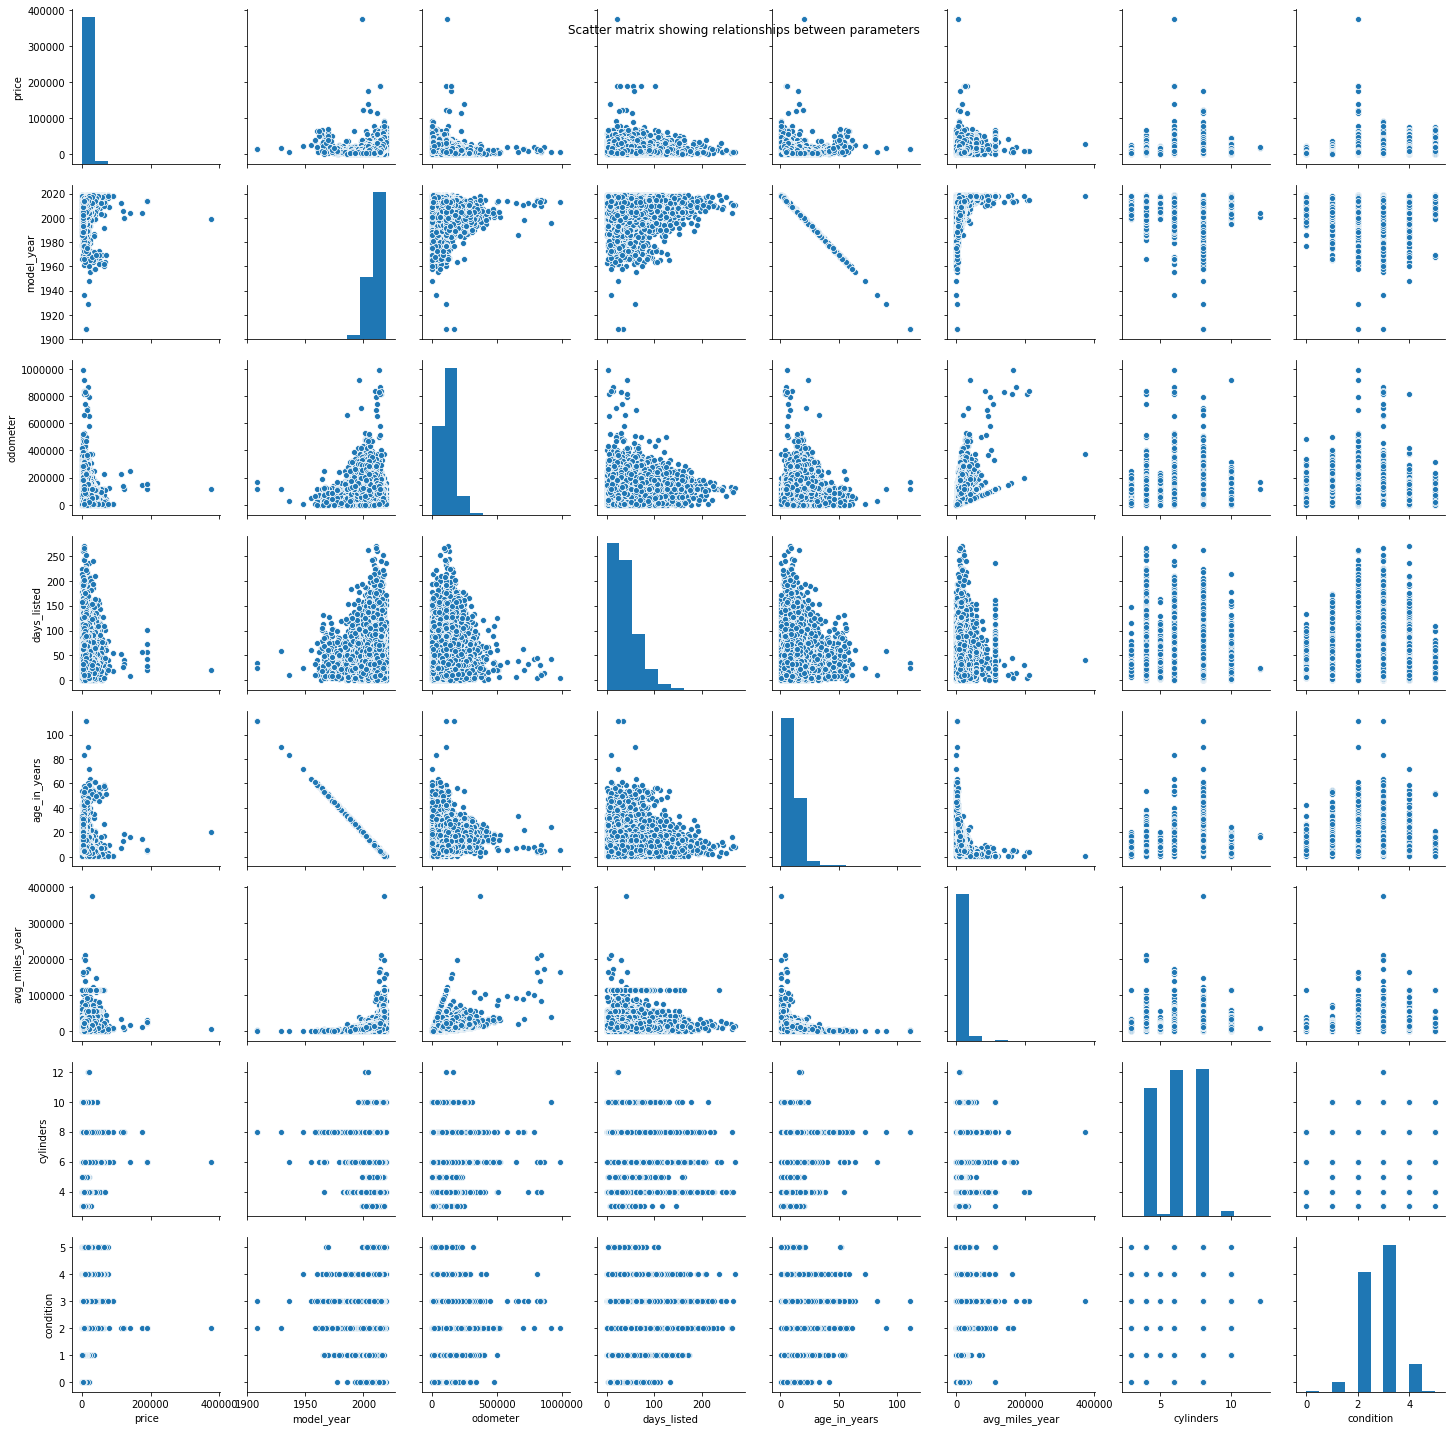

In [57]:
# scatter matrix
ax = sns.pairplot(
    vehicles[['price', 'model_year', 'odometer', 'days_listed', 'age_in_years', 'avg_miles_year', 'cylinders', 'condition']]
)
ax.fig.suptitle('Scatter matrix showing relationships between parameters');


Each cell of this grid shows the relationship between pair of parameters. The upper left cell shows the connection between price and price. This is a histogram showing the price distribution. We can see that most price lie between 0 and 50,000. The diagonal shows the histogram of parameters. We can look at this in better details in later section. The second cell .i.e. price vs. model_year shows that most car price was below 100,000 and the model year was between 1960 and 2018. In the price vs. odometer cell, we notice the data was heavily concentrated towards the left with some outliers in the data. In the price vs. days_listed cell, the data is also heavily concentrated to the left. We can see that at the 0 days_listed so many ads were listed. This could either mean that the ads were listed and removed same day. In that case, we would need to investigate the data further. The correlation of several numerical variables and the scatter plot shows that our dataset contains some outliers. We can plot histograms for the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition, and study how outliers affect the form and readability of the histograms.


# Histograms of parameter

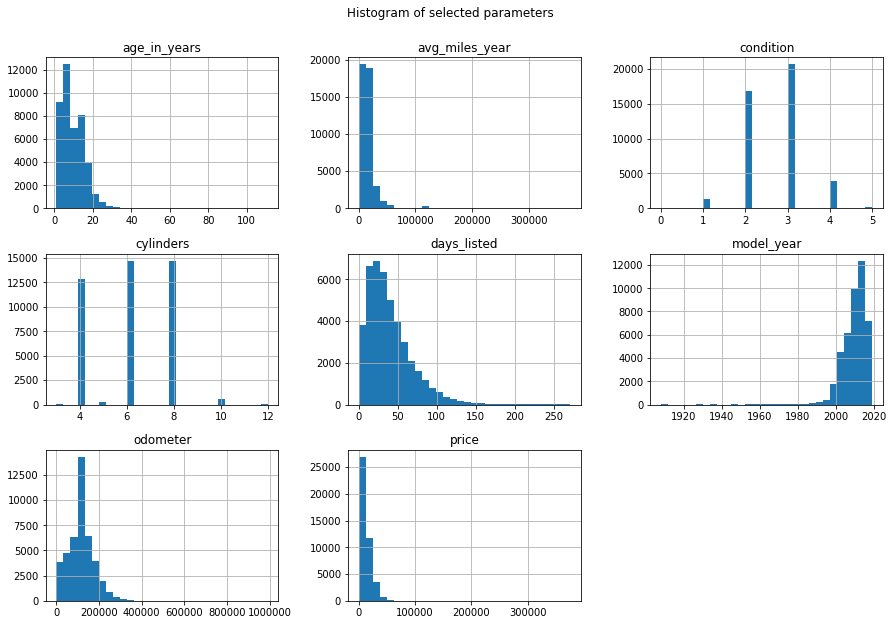

In [34]:
# histogram of selected variables
vehicles[['price', 'model_year', 'odometer', 'days_listed', 'age_in_years', 'avg_miles_year', 'cylinders', 'condition']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of selected parameters', y=0.95);

Let's take a closer look at each of these variables

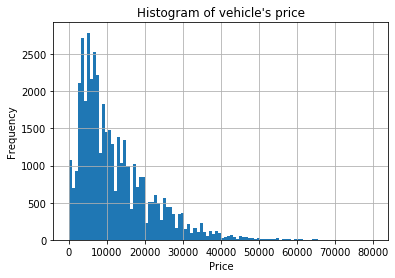

In [35]:
# histogram of vehicle's price
vehicles['price'].hist(bins=100, range=[0, 80000])

# add title and axis names
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Histogram of vehicle's price");

The chart above shows the frequency distribution of price in the data. The chart shows that the distribution is skewed right. Most car price fall in the low/medium range of price, with a few exceptions that are distributed along a large range (long "tail") of higher values. The peak of the histogram is around the 5000 mark. The spread of the data ranges from 1 to 375,000 with the median at 9000. By looking at the histogram, we can conclude that the data countains significant outlier.

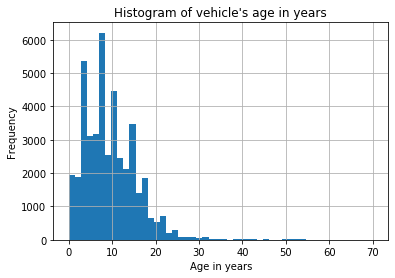

In [36]:
# histogram of vehicle's age in years
vehicles['age_in_years'].hist(bins=50, range=[0, 70])

# add title and axis names
plt.xlabel('Age in years')
plt.ylabel('Frequency')
plt.title("Histogram of vehicle's age in years");



The histogram above shows the distribution of the vehicle's age in years in the data. We can see that the distribution is skewed right. Most vehicle age is between 0 and 20 years, with a few exceptions that are distributed along a large range (long "tail") of higher value. The spread of the data ranges from 0 to 110 years with the median around 7 years. We can conclude that the data contains significant outliers as seen in the long tail and the maximum age of 110 years.


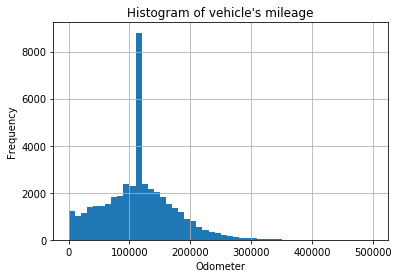

In [37]:
# histogram of vehicle's mileage
vehicles['odometer'].hist(bins=50, range=[0, 500000])

# add title and axis names
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title("Histogram of vehicle's mileage");


The histogram above shows the distribution of the vehicle's mileage. We can see that the distribution is skewed right. Most odometer reading lie between 0 and 200,000. The spread of the data ranges from 0 to 990,000 with the median around 113,000. We can conclude from this distribution that the vehicle's mileage contains significant outliers as seen in the long tail and the maximum odometer value of 990,000.
Conclusion: The above three chart shows that the distribution is right-skewed, and there are extreme higher values at the right of the histogram. We can conclude that there are outliers just by looking at the distribution of the data.

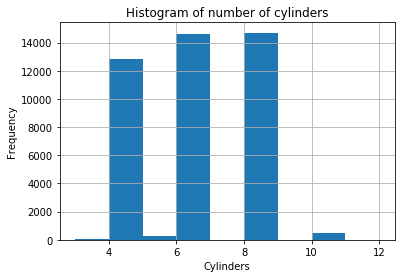

In [38]:
# histogram of number of cylinders
vehicles['cylinders'].hist(bins=9)

# add title and axis names
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.title("Histogram of number of cylinders");


The above histogram shows the distribution of the number of cylinders in the data. We can see that the 6 and 8 cylinders vehicles are mostly represented in the data. The spread of the number of cylinders ranges from 3 to a maximum at 12 cylinders. Infact most vehicles in the data represents vehicles built with 4-cylinders, 6-cylinders (or V6), and 8-cylinders (or V8). We can conclude that the distribution contains some outlier considering that the median is 6, the mean is $\approx$6, and the standard deviation is $\approx$1.7.

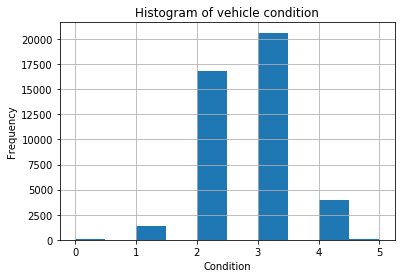

In [39]:
# histogram of vehicle condition
vehicles['condition'].hist(bins=10)

# add title and axis names
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title("Histogram of vehicle condition");

The histogram of vehicle condition shows that most vehicles in the dataset are in good or excellent condition. Very few salvage, fair and new vehicles are listed. The spread of the condition ranges from salvage at 0 to new at 5, with a median at 3 (or excellent condition). We can conclude that the distribution has some outliers.


# Analyze days advertisements were displayed

We can study how many days advertisements were displayed days_listed.

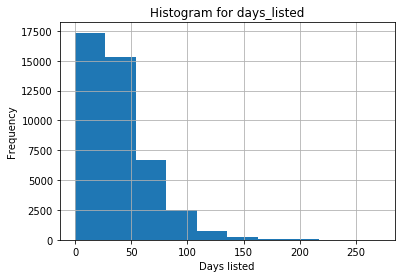

In [40]:
# histogram for days_listed
vehicles['days_listed'].hist()

# add title and axis names
plt.xlabel('Days listed')
plt.ylabel('Frequency')
plt.title("Histogram for days_listed");



The histogram above shows the distribution of days vehicle was listed after removing outliers. We can see that the mean lifetime of an ad is 39 days and the median is 33 days. In general, the lifetime of an ad appears to be around one month. There are ads that were listed for 0 days. This could be because the car sold the same day hence the ad was not listed for a full day. There are also ads that were up for 271 days. That is almost a year which is a long time for a car to be on sale! However, it's not impossible. The expected listing length of about a month seems to match what we'd expect in the real world.

In [41]:
# vehicles with shortest listing time
days_listed_0 = vehicles.query('days_listed <= 1')
days_listed_0.shape

(183, 19)

In [42]:
# vehicles with shortest listing time
days_listed_100 = vehicles.query('days_listed > 100')
days_listed_100.shape

(1629, 19)

From the analysis of the number of days an advertisement was displayed, we can see that the typical lifetime of an ad is around one month with more than 14,000 ads listed. By inspecting the histogram, we determined that 41 ads were listed and removed same day.i.e. listed for 0 days. This could be because the car sold the same day hence the ad was not listed for a full day. Also, 137 ads was listed and removed next day .i.e. listed for just 1 day. We can also observe that about 1580 ads were listed for more than 100 days, and some ads staying up for 271 days. That is quite a long time for a car to be on sale. However, it is not impossible! The expected listing length of a month seems to match what we would expect in the real world. We can conclude that ads were removed quickly after 1 day, and ads were abnormally listed for 271 days.

To ensure that we do not introduce bias in the data when carrying out analysis, we would be assuming that vehicles listed after 7 days, and less than 100 days is the appropriate duration for the vehicle listing. One week is appropriate for a car to be listed and sold if the car is in good or excellent condition, and about 100 days is appropriate if the car is in fair condition. We do this because we wouldn't want to exclude too many data points by using the average of 39 days. In addition, about 2500 ads were listed around 110 days. Excluding this set could introduce bias in the dataset.


# Analyze the number of ads and average price for each vehicle type

In [43]:
# calculate the mean days listed for listings less than a day
print('Mean number of hours for listing less than a day is {:.1f} hours'.format(days_listed_0['days_listed'].mean() * 24))

Mean number of hours for listing less than a day is 18.2 hours


In [44]:
# aggregate of data by vehicle type, days listed across vehicles
normal_listing = vehicles.query('7 <= days_listed <= 100').pivot_table(
    index='type', values='days_listed', aggfunc=['mean', 'count']
)
normal_listing.columns = ['mean_days_listed', 'vehicles']
print(normal_listing.sort_values(by='mean_days_listed', ascending=False).head())

           mean_days_listed  vehicles
type                                 
bus               41.650000        20
hatchback         39.284974       772
offroad           39.067901       162
wagon             38.647110      1159
other             38.085106       188


In [45]:
# calculate the average price per brand
brand_stat = vehicles.query('7 <= days_listed <= 100').pivot_table(
    index='type', values = 'price', aggfunc = 'mean'
)
print(brand_stat)


                    price
type                     
SUV          11164.429492
bus          16638.800000
convertible  14232.413793
coupe        14198.623180
hatchback     6753.174870
mini-van      8176.273672
offroad      14678.944444
other        11274.265957
pickup       16210.896276
sedan         7017.171651
truck        16708.250132
van          10358.926316
wagon         9089.283003


In [46]:
# join aggregate of days listed, vehicle count with the average price
normal_brand_listing = normal_listing.join(brand_stat, on='type').reset_index()
print(normal_brand_listing)

           type  mean_days_listed  vehicles         price
0           SUV         37.951199      9467  11164.429492
1           bus         41.650000        20  16638.800000
2   convertible         37.675287       348  14232.413793
3         coupe         37.271557      1786  14198.623180
4     hatchback         39.284974       772   6753.174870
5      mini-van         37.420323       866   8176.273672
6       offroad         39.067901       162  14678.944444
7         other         38.085106       188  11274.265957
8        pickup         38.042272      5370  16210.896276
9         sedan         37.657238      9263   7017.171651
10        truck         37.934941      9499  16708.250132
11          van         37.886316       475  10358.926316
12        wagon         38.647110      1159   9089.283003


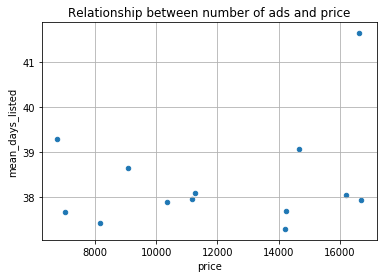

In [47]:
# scatterplot showing the relationship between number of ads and price
normal_brand_listing.plot(
    x='price', 
    y='mean_days_listed', 
    title = 'Relationship between number of ads and price', 
    kind='scatter', 
    grid=True
);


We try to plot the relationship between number of ads and the price. There is no linear relationship observed .i.e. the vehicle price is not determined by the number of days ads were listed

# Conclusion

We then plotted the histogram and observed the skewness of our data. We started by checking for correlation among numerical variables. Our analysis shows that the bus and hatchback are the two types with the greatest number of ads. 

# Part 5: Determine what factors impact price the most

In [48]:
# create new variable for popular vehicles
good_vehicles_filtered = vehicles.query('7 <= days_listed <= 100')

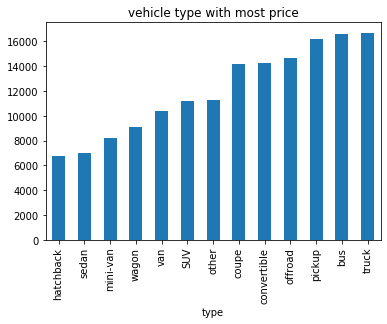

In [49]:
# determine the type with the most price
(good_vehicles_filtered
     .groupby('type')['price']
     .mean()
     .sort_values()
     .plot(kind='bar', title='vehicle type with most price')
);

We group the cars types by price and find the mean price. This was used to plot a distribution plot. From the plot above, we can see that bus, truck, pickup, offroad and coupe are the five car types with the most price. The car type with the least price is the hatchback.


In [50]:
# top 5 vehicle categories
vehicles_top5 = good_vehicles_filtered[good_vehicles_filtered.type.isin(['bus', 'truck', 'pickup', 'offroad', 'coupe'])]
vehicles_top5.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_in_years,avg_miles_year
2,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,others,0,2019-03-22,9,4,12,3,2019,17,6647
8,19500,2011,chevrolet silverado 1500,3,8,gas,128413,automatic,pickup,black,1,2018-09-17,38,0,38,9,2018,8,16051
10,18990,2012,ram 1500,3,8,gas,140742,automatic,pickup,others,1,2019-04-02,37,1,14,4,2019,8,17592
14,14990,2010,ram 1500,3,8,gas,130725,automatic,pickup,red,1,2018-12-30,13,6,52,12,2018,9,14525
19,7500,2004,chevrolet silverado,4,8,gas,180000,automatic,truck,red,1,2019-01-05,64,5,1,1,2019,16,11250


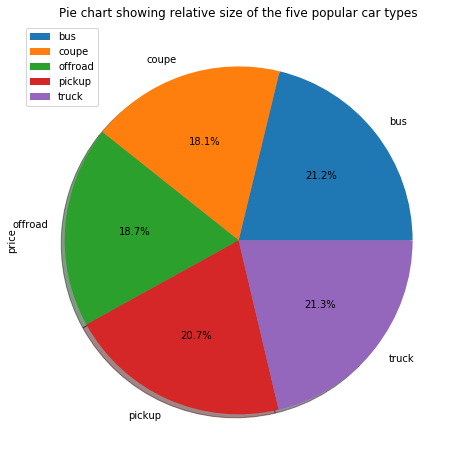

In [51]:
# pie chart visualize the relative size of these vehicle type in terms of price
(vehicles_top5
     .pivot_table(index='type', values='price', aggfunc=['count', 'mean'])
     .plot(y='mean', kind='pie', 
           title = 'Pie chart showing relative size of the five popular car types', 
           figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);


We plot the pie chart showing the relative size of the five popular car types. We can observe that of the five popular car types, bus takes up a sizeable portion at 21.7% followed by truck with 20.8%.

(0, 40000)

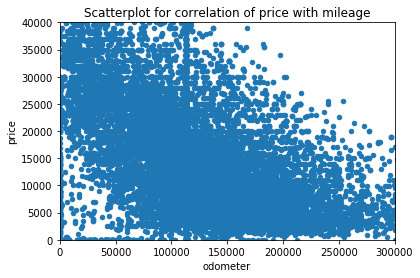

In [52]:
# correlation of price with mileage
vehicles_top5.plot.scatter(x='odometer', y='price', title='Scatterplot for correlation of price with mileage');
plt.xlim([0, 300000])
plt.ylim([0,40000])


We plot the scatterplot to check linear correlation of the price with mileage. We can observe that price has a negative correlation with the mileage. As the mileage decreases, the price increases or the higher the price, the lower the mileage.

(0, 40000)

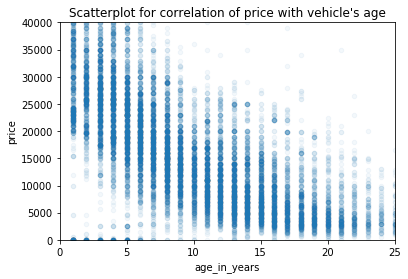

In [53]:
# correlation of price with age
vehicles_top5.plot.scatter(x='age_in_years', y='price', title="Scatterplot for correlation of price with vehicle's age", alpha=0.05);
plt.xlim([0,25])
plt.ylim([0,40000])

We plot the scatterplot to check linear correlation of the price with vehicle's age. We can observe that price has a negative correlation with the age of the vehicle. i.e. the older the car, the lower the price. Newer cars or cars less than 5 years old command higher price which is to be expected.

(1990, 2020)

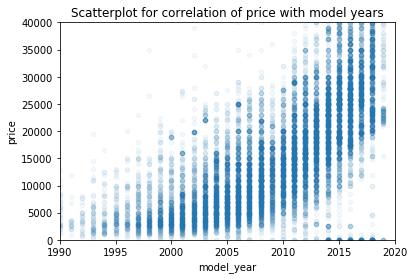

In [54]:
# correlation of price with model years
vehicles_top5.plot.scatter(x='model_year', y='price', title="Scatterplot for correlation of price with model years", alpha=0.05);
plt.ylim([0,40000])
plt.xlim([1990,2020])

Our correlation plot of price with model years shows that older cars command lower price. The year with the highest price range is between 2010 to 2020. This is to be expected. Newer cars should command high price.

(0, 40000)

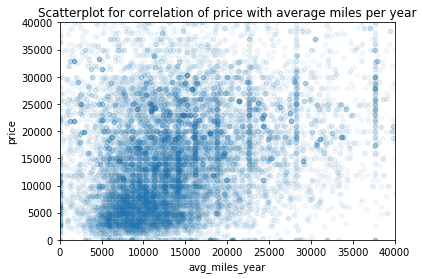

In [55]:
# correlation of price with average miles per year
vehicles_top5.plot.scatter(x='avg_miles_year', y='price', title="Scatterplot for correlation of price with average miles per year", alpha=0.05);
plt.ylim([0,40000])
plt.xlim([0, 40000])

From the scatterplot for correlation of price with average miles per year, we don't really notice a direct correlation between the variables. We can say that the variables are not so correlated based on the plot.

(0, 40000)

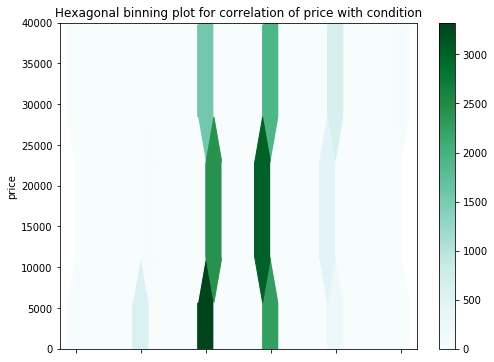

In [58]:
# correlation of price with condition
vehicles_top5.plot(
x= 'condition', y='price', title = 'Hexagonal binning plot for correlation of price with condition',
kind = 'hexbin', gridsize=20, figsize=(8,6)
);
plt.ylim([0,40000])

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


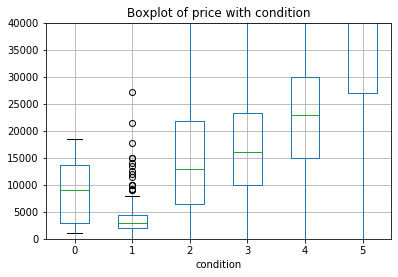

In [58]:
# box plot of price with condition
(vehicles_top5
     .query('days_listed >= 50')
     .boxplot(by='condition', column='price')
)
plt.ylim([0,40000])
# add title
plt.title('Boxplot of price with condition')
plt.suptitle("")
plt.show();
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)


We queried the data for listing of at least 50 ads and plotted the boxplot of condition grouped by price. We observed that the condition with the most price is the like new (or 4). The boxplot shows cars with fair (or 1) having the least price. This shows that the condition has a huge influence on the price.


(0, 40000)

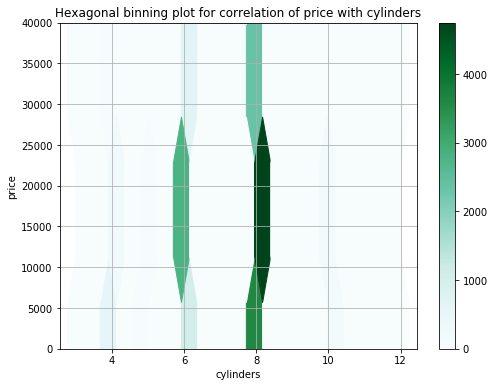

In [59]:
# correlation of price with cylinders
vehicles_top5.plot(
    x='cylinders', y='price', title = 'Hexagonal binning plot for correlation of price with cylinders', 
    kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True
);
plt.ylim([0,40000])


The hexagonal binning plot shows that most of our dataset contains cars that have 6 and 8 cylinders. We observe from the data that cars with 6- and 8-cylinders command higher price than cars with other cylinders types. Cars with more cylinders have a higher average price. This makes sense because number of cylinders is related to the power of the engine. More powerful cars are generally more expensive.

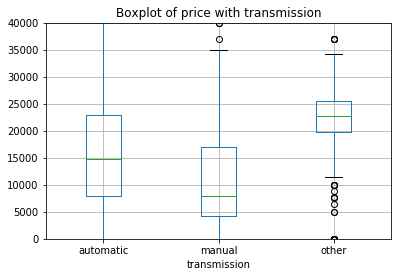

In [60]:
# correlation of price with transmission type
(vehicles_top5
     .query('days_listed >= 50')
     .boxplot(by='transmission', column='price')
)
plt.ylim([0,40000])
# add title
plt.title('Boxplot of price with transmission')
plt.suptitle("")
plt.show();


Looking at the box plot of relationship between transmission and price, we observe that transmission has an influence on the price. Car with automatic transmission cost about 32% more than cars with manual transmission. This is to be expected because most cars with automatic transmission are newer cars. We can conclude that cars with automatic transmission tends to cost more on the avarage than cars with manual transmission. Thus, the type of transmission has a big impact on the price.

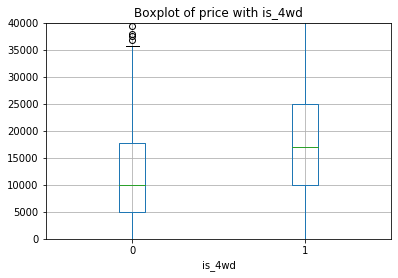

In [61]:
# correlation of price with is_4wd
(vehicles_top5
     .query('days_listed >= 50')
     .boxplot(by='is_4wd', column='price')
)
plt.ylim([0,40000])
# add title
plt.title('Boxplot of price with is_4wd')
plt.suptitle("")
plt.show();


The box plot of the relationship between price and whether a car is 4wd or not shows that cars that are 4wd cost more than cars that are not. This is to be expected because cars with 4wd will likely be a 6- or 8-cylinder vehicle, and hence will cost more. Also, people are more likely to pay more for a 4wd because of that extra feature in the drivetrain.

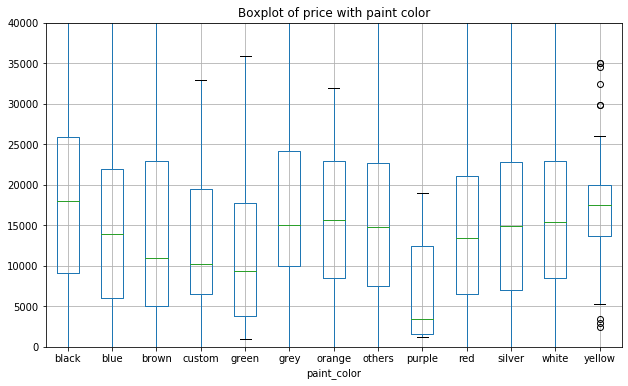

In [62]:
# correlation of price with paint_color
(vehicles_top5
     .query('days_listed >= 50')
     .boxplot(by='paint_color', column='price', figsize=(10,6))
)
plt.ylim([0,40000])
# add title
plt.title('Boxplot of price with paint color')
plt.suptitle("")
plt.show();


From the boxplot of price with paint color, there is no clear difference in price based on the color. The distribution of price between different color categories have a significant overlap, and so paint color would not be a good predictor of price.


# Conclusion

We generated a pie chart using the relative size of the vehicle type in terms of price. We then plotted scatter plot to illustrate the correlation of certain features with price. The plot of correlation with mileage shows a negative correlation .i.e. the higher the mileage, the lower the price. Typically, fewer miles translate to higher resale value. Similar observation was noticed in the correlation plot of age with price. We observed that as the age of a car increases, the price decreases. In contrast, the plot of price with model years shows that as the model year of the car increases, the price increases too. The condition of the car is equally an important feature. We observe from the data that cars with good, excellent, and like-new conditions command higher price than cars with other conditions. We also noticed that cars with 4wd command higher price than cars without 4wd. Looking at the scatterplot for the correlation of transmission type with price, we can see that cars with automatic transmission command higher price than manual transmission type. This shows that type of transmission is an important factor that affects car price. The distribution of price between different color categories have a significant overlap, and so paint_color would not be a good predictor of price.

# Part 6 :  Overall conclusion

From the data preprocessing stage, we identified missing values in our data and noted that the values are Missing at random (MAR). We used a couple of methods for handling the missing values on a case-by-case basis. We dropped missing rows in model_year and cylinders column, replaced missing value in the odometer column using the median, and created new category for missing values in the paint_color column. We then identified different data types and proceeded to change datatypes. We made calculations, created new features and used those features to determine the vehicle's age in years age_in_years, and the average miles per year, avg_miles_year. We plotted the distribution of the data and carry out analysis. From our analysis, we found that the typical lifetime of an ad is around one month. We also observe that ads were removed quickly after 1 day, and ads were abnormally listed for 271 days.

We observe that the bus and hatchback are the two types with the greatest number of ads. We plotted visualization and analyzed the data to have a better understanding of our data and the important factors that influence the price of a vehicle. Our analysis shows that the following variables are important predictor of vehicle price:

mileage

age_in_years

model_years

condition

cylinders

transmission type


Knowing this is important because we are able to answer the business question about what factors influence vehicle price for listings at Crankshaft List.
